# CS224n: NLP with Deep Learning

# Lecture 3: Word Window Classification, Neural Networks and Calculus

---

## Classification review/intro

* Our learned line between red and green is our classifier

### Softmax classifier
$$ \boxed{
p(y|x) = \frac{exp(W_{y} \cdot x)}{\sum_{c=1}^C exp(W_{c} \cdot x)} 
}
$$

2 steps:
1. the $y^{th}$ row of $W$ is for the $y^{th}$ class  
Multiplying it by $x$ gives us a score :
2. Then we apply the softmax function to get a probability distribution

**Objective:**
minimize our negative log-probability $ -log p(y|x) $

### Cross-entropy loss

* $p = $  true probability distribution
* $q = $  computed probability distribution

Cross-entropy:
$$ H(p,q) = - \sum_{c=1}^C p(c) \, log \, q(c) $$

Cross-entropy loss:
$$ J(\theta) = \frac{1}{N} \sum_{i=1}^N -log \left( \frac{e^{f_{y_i}}} {\sum_{c=1}^C e^{f_c}} \right) $$

---

## Neural nets intro

* Logistic regression, SVM, Naïve Bayes are all simple classifiers:  
they just draw a line in some high-dimensional space

* But oftentimes we'd like a more sophisticated classifier, especially on natural data

### NLP Deep Learning

* We're simultaneously changing both the weights, and the words vector representations as we're learning
* We're optimising both of them at once
* Representation Learning

We can interpret the word embeddings as the first hidden layer of a network that takes as inputs the 1-hot encoded vectors of the words

#### Biological Neuron analogy

Dendrites -> Enough Signal -> Body of the Neuron -> Axon -> Dendrites of other Neurons

#### A little bit of Neural Net History

* 50s: Perceptron
* 80s-90s: 1 hidden layer neural net


We need to introduce a non-linearity for our neural net to learn something interesting, otherwise we just get another linear function

---

## Named Entity Recognition (NER)

Task = find the names of things, and classify them

### Possible usages:
* track the names of companies and people
* answers of questions often are named entities
* information often is just an association of 2 named entities

### Difficulties

* Hard to determine the boundaries of an entity
* Hard to know if something is an entity
* Hard to know the class of a new entity

---

## Binary true vs corrupted word window clasification

**Idea:**  
Classify a word in its context window

We could design a classifier that classifies the middle word according to the context window words: this way, the order information would be preserved 

(as opposite to taking the sum vector of all the context words)

### NER of center-of-window word

We want to have a system that returns a score if there is a Location name in the middle

1. Concatenate the context window words' vector representations
2. Pass it through a first non-linearity
3. Multiply it by a big $U^$ matrix

Putting our extra hidden layer allows us to calculate **non-linear** things, from our input vector, such as:
* The first word is 'museum'
* AND the 2nd word is 'in'  

Then, our 3rd word (here, our center word), is a Location name.


---

## Matrix calculus intro

We will use matrix calculus to calculate our gradients

### Gradient

$f(\mathbf{x}) = f(x_{1}, x_{2}, ..., x_{n})$

Gradient: 

$ \frac{\partial f} {\partial \mathbf{x}} = 
\left [ \frac{\partial f}{\partial \mathbf{x_1}},
\frac{\partial f} {\partial \mathbf{x_2}},
...,
\frac{\partial f} {\partial \mathbf{x_n}}
\right ]
$

### Jacobian Matrix

The Jacobian Matrix is the Generalization of the Gradient

$ \mathbf{f}(\mathbf{x}) = \left [ f_{1}(x_{1}, ..., x{n}), ..., f_{m}(x_{1}, ..., x{n}) \right ] $

Jacobian: 

$$ 
\boxed{
\frac{\partial \mathbf{f}} {\partial \mathbf{x}}
= 
\left ( \frac{\partial \mathbf{f_{i}}} {\partial \mathbf{x_{j}}} \right )_{i,j}
}
$$

$ 
\frac{\partial \mathbf{f}} {\partial \mathbf{x}}
= 
\begin{bmatrix}
\frac{\partial f_{1}}{\partial x_{1}} & \cdots & \frac{\partial f_{1}}{\partial x_{n}}\\ 
\vdots & \ddots & \vdots \\ 
\frac{\partial f_{m}}{\partial x_{1}} & \cdots & \frac{\partial f_{m}}{\partial x_{n}}
\end{bmatrix}
$

### Chain Rule

For 1-variable functions: **Multiply Derivatives**

For mutliple variable functions: **Multiply JACOBIANS**


$ \mathbf{h} = f(\mathbf{z})$

$ \mathbf{z} = \mathbf{W} \mathbf{x} + \mathbf{b}$

$ \frac{\partial \mathbf{h}} {\partial \mathbf{x}} = 
\frac{\partial \mathbf{h}} {\partial \mathbf{z}} 
\frac{\partial \mathbf{z}} {\partial \mathbf{x}} = \cdots
$

**Examples**

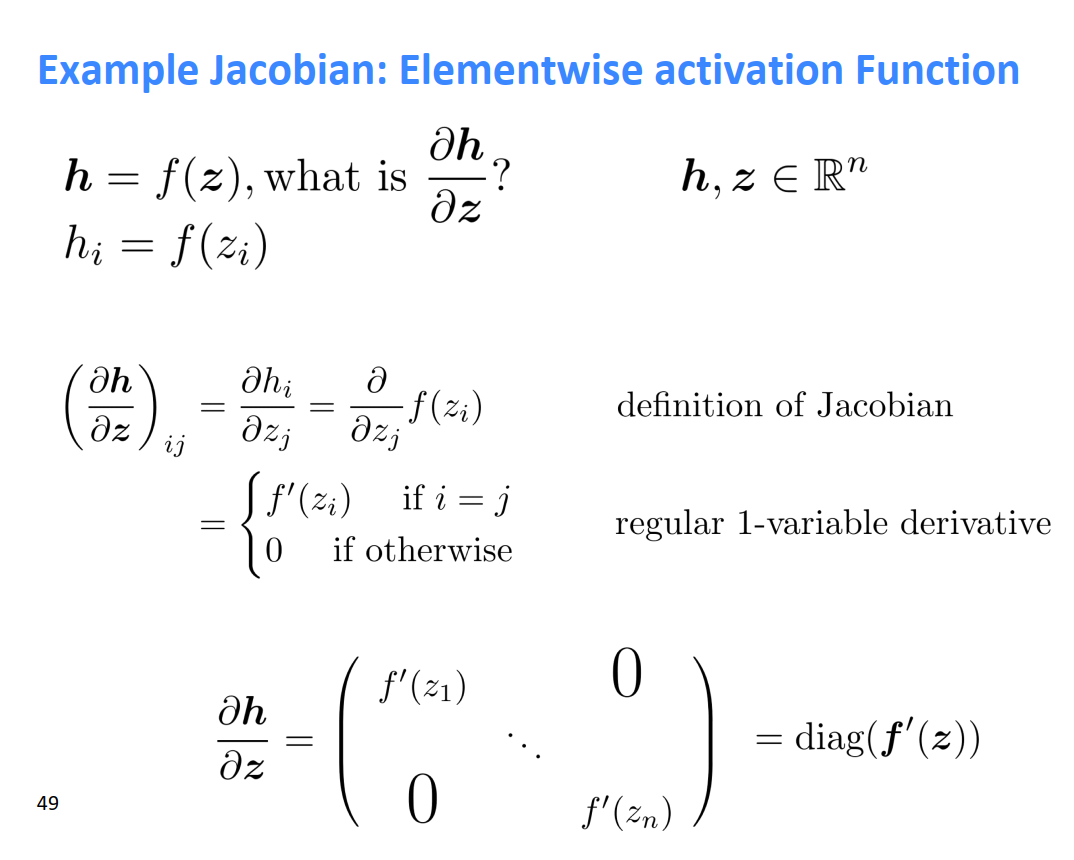

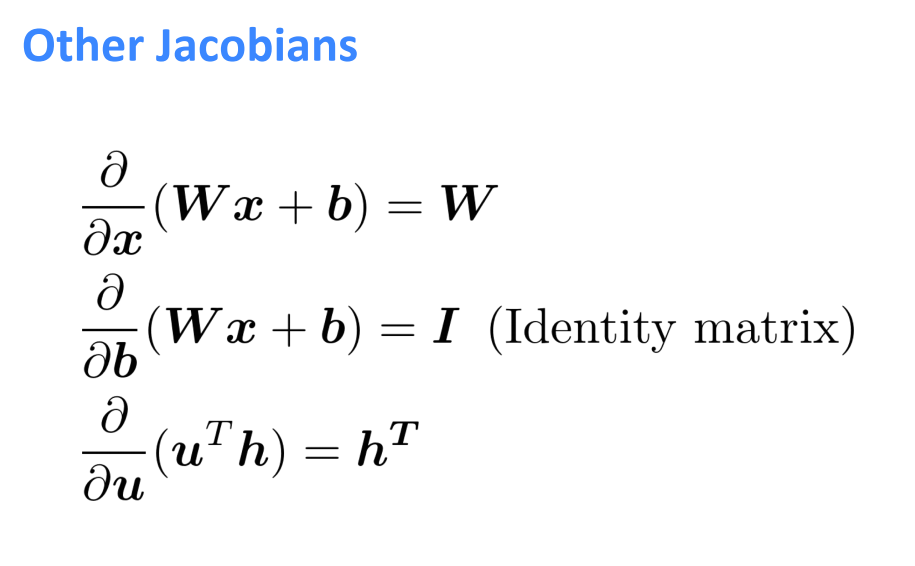

### Practicing on a small example

1. Break up the equations into simple smaller pieces  
(**Recommended**: define new variables for each step!)

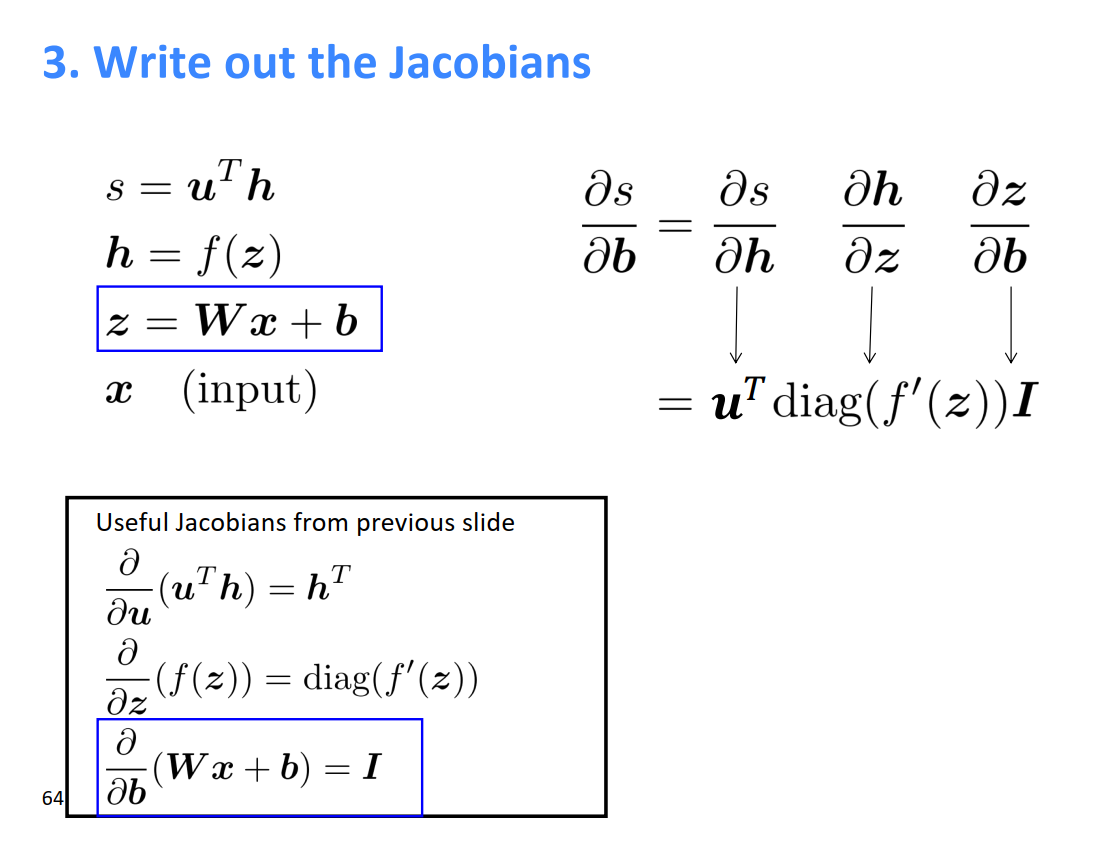

Now, we want to calculate the derivative with respect to $W$

We notice that, during the calculation of the derivative, most of the terms are the same as with respect to *b*!


$\delta$ is the error signal

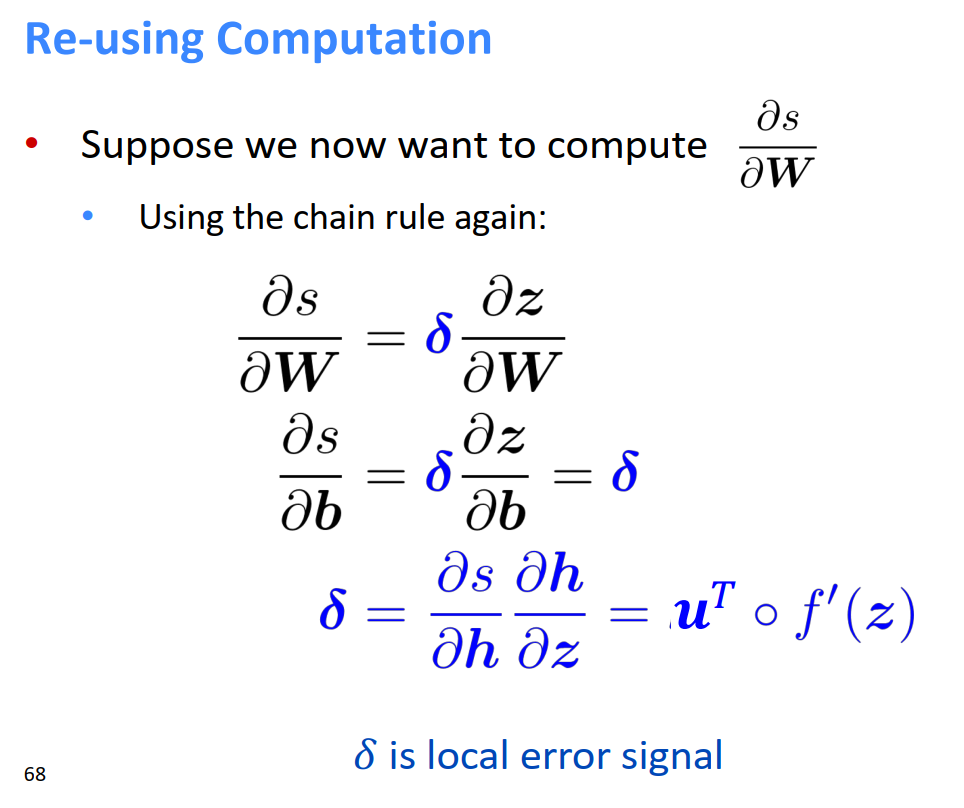

We are using the shape convention:  
The shape of the gradient is the same shape as that of the inputs

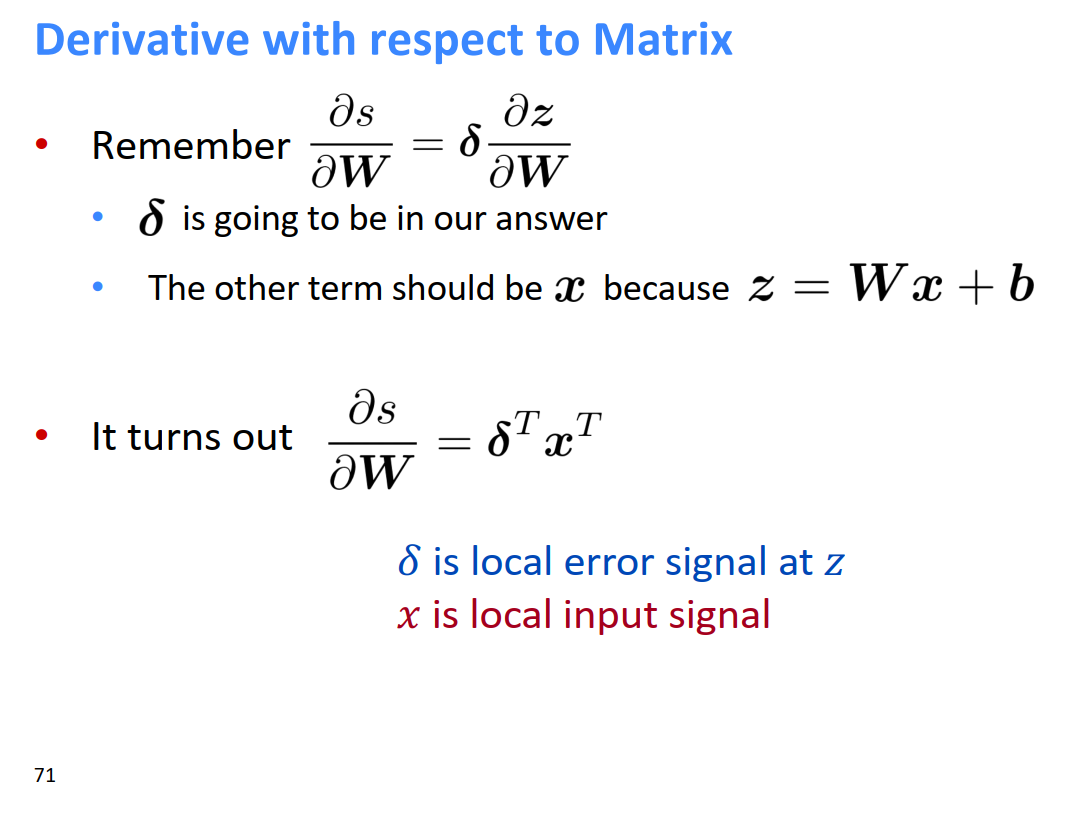

### Shape contradications

It appears that we are trying to follow 2 contradictory shape conventions:

1. The Jacobian form, which is easy for calculations
2. The parameter convention, where we want our gradient's shape to match our parameter's, so that we can use it in the graident descent update

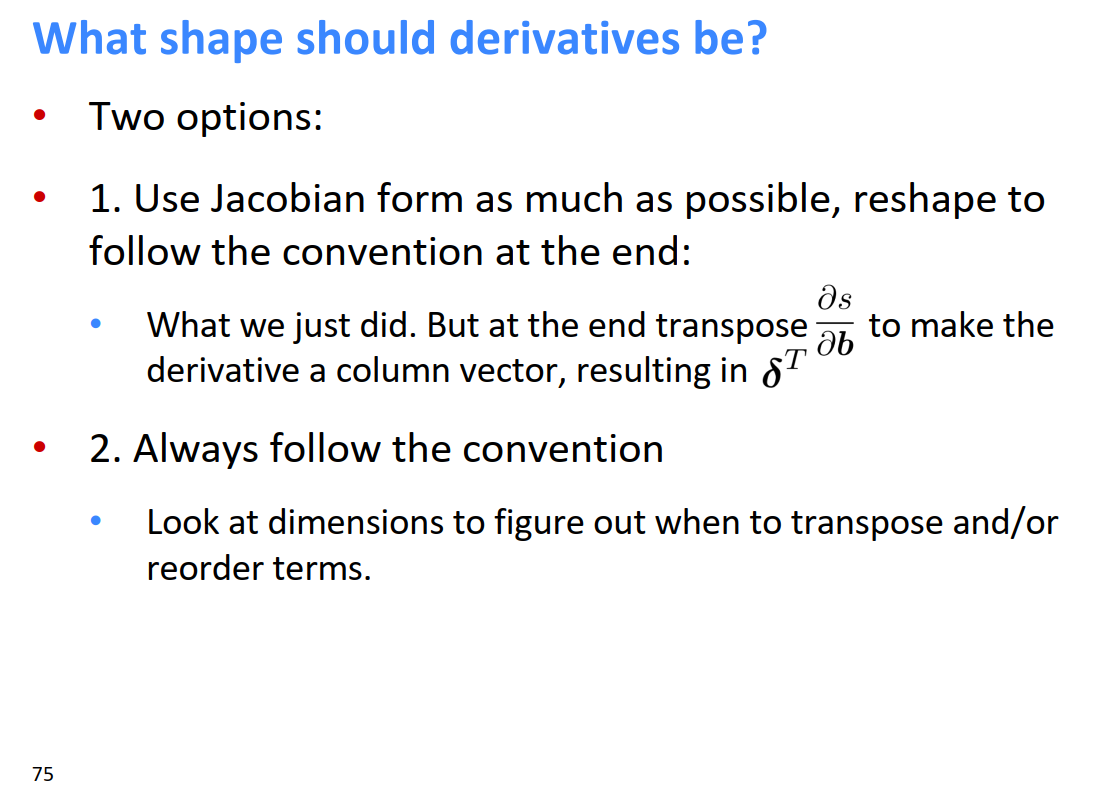